In [1]:
import os
import pandas as pd
#list the files
filelist = os.listdir('30_speakers_train') 
#read them into pandas
train_df = pd.DataFrame(filelist)

In [2]:
train_df.head()

,0
0,7278-91083-0000.flac
1,7278-91083-0001.flac
2,7278-91083-0002.flac
3,7278-91083-0003.flac
4,7302-86814-0000.flac


In [3]:
# Renaming the column name to file
train_df = train_df.rename(columns={0:'file'})

In [4]:
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [5]:
train_df

,file
0,7302-86814-0000.flac
1,8014-112586-0001.flac
2,7302-86814-0003.flac
3,8108-274318-0002.flac
4,7859-102518-0001.flac
...,...
115,8123-275193-0000.flac
116,8425-246962-0003.flac
117,7794-295947-0002.flac
118,8098-275181-0001.flac


In [6]:
# We create an empty list where we will append all the speakers ids for each row of our dataframe by slicing the file name since we know the id is the first numbers before the hash
speaker = []
for i in range(0, len(train_df)):
    speaker.append(train_df['file'][i].split('-')[0])

In [7]:
train_df['speaker'] = speaker

In [8]:
train_df.head()

,file,speaker
0,7302-86814-0000.flac,7302
1,8014-112586-0001.flac,8014
2,7302-86814-0003.flac,7302
3,8108-274318-0002.flac,8108
4,7859-102518-0001.flac,7859


In [9]:
filelist = os.listdir('30_speakers_val') 
#read them into pandas
val_df = pd.DataFrame(filelist)

In [10]:
val_df

,0
0,7278-91083-0008.flac
1,7278-91083-0009.flac
2,7278-91083-0010.flac
3,7302-86814-0007.flac
4,7302-86814-0008.flac
...,...
85,8465-246940-0008.flac
86,8465-246940-0009.flac
87,8468-286673-0007.flac
88,8468-286673-0008.flac


In [11]:
val_df = val_df.rename(columns={0:'file'})

In [12]:
val_df = val_df.sample(frac=1).reset_index(drop=True)

In [13]:
speaker = []
for i in range(0, len(val_df)):
    speaker.append(val_df['file'][i].split('-')[0])

In [14]:
val_df['speaker'] = speaker

In [15]:
val_df

,file,speaker
0,8088-284756-0009.flac,8088
1,7312-92432-0009.flac,7312
2,8238-274553-0009.flac,8238
3,8468-286673-0007.flac,8468
4,8014-112586-0007.flac,8014
...,...,...
85,7635-105409-0009.flac,7635
86,7402-59171-0009.flac,7402
87,7859-102518-0009.flac,7859
88,7511-102419-0009.flac,7511


In [16]:
filelist = os.listdir('30_speakers_test') 
#read them into pandas
test_df = pd.DataFrame(filelist)

In [17]:
test_df = test_df.rename(columns={0:'file'})

In [18]:
test_df = test_df.sample(frac=1).reset_index(drop=True)

In [19]:
speaker = []
for i in range(0, len(test_df)):
    speaker.append(test_df['file'][i].split('-')[0])

In [20]:
test_df['speaker'] = speaker

In [21]:
test_df

,file,speaker
0,7312-92432-0004.flac,7312
1,8014-112586-0006.flac,8014
2,8088-284756-0005.flac,8088
3,8051-118101-0004.flac,8051
4,7635-105409-0005.flac,7635
...,...,...
85,8123-275193-0004.flac,8123
86,7800-283478-0004.flac,7800
87,8468-286673-0005.flac,8468
88,8238-274553-0005.flac,8238


In [22]:
train_df

,file,speaker
0,7302-86814-0000.flac,7302
1,8014-112586-0001.flac,8014
2,7302-86814-0003.flac,7302
3,8108-274318-0002.flac,8108
4,7859-102518-0001.flac,7859
...,...,...
115,8123-275193-0000.flac,8123
116,8425-246962-0003.flac,8425
117,7794-295947-0002.flac,7794
118,8098-275181-0001.flac,8098


In [23]:
test_df.head()

,file,speaker
0,7312-92432-0004.flac,7312
1,8014-112586-0006.flac,8014
2,8088-284756-0005.flac,8088
3,8051-118101-0004.flac,8051
4,7635-105409-0005.flac,7635


In [24]:
val_df.head()

,file,speaker
0,8088-284756-0009.flac,8088
1,7312-92432-0009.flac,7312
2,8238-274553-0009.flac,8238
3,8468-286673-0007.flac,8468
4,8014-112586-0007.flac,8014


In [25]:
import librosa
import numpy as np

In [26]:
import glob

In [27]:
import random

In [28]:
import librosa.display

In [29]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)

def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_train')+'/'+str(files.file))
    print(file_name)

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [30]:
train_features = train_df.apply(extract_features, axis=1)

C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7302-86814-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8014-112586-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7302-86814-0003.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8108-274318-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7859-102518-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7278-91083-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8095-274345-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8425-246962-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8063-274112-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8226-274369-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8238-274553-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers

C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=900
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7402-59171-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7447-91186-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7800-283478-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8425-246962-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7402-59171-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7859-102518-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7859-102518-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8088-284756-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8088-284756-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8468-286673-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7278-91083-0002.flac


C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=834
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8088-284756-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8324-286681-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7447-91186-0003.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8051-118101-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8095-274345-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7635-105409-0003.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7517-100429-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8468-286673-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8123-275193-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8051-118101-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8095-274345-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speake

C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=709
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7447-91186-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8465-246940-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8095-274345-0003.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7367-86737-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7302-86814-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8014-112586-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7278-91083-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8226-274369-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8312-279790-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7367-86737-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7800-283478-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_t

C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=926
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7312-92432-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8419-286667-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7511-102419-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8123-275193-0000.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8425-246962-0003.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/7794-295947-0002.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8098-275181-0001.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_train/8088-284756-0003.flac


In [70]:
train_features

0      ([-333.4225, 111.555855, -6.5648766, 39.01111,...
1      ([-440.90036, 78.803795, 3.6576352, 29.471083,...
2      ([-329.99475, 112.845345, -7.87901, 41.892086,...
3      ([-364.01373, 106.98511, -21.287502, 54.265522...
4      ([-338.32397, 127.13915, -20.86579, 26.862549,...
                             ...                        
115    ([-387.12476, 111.12849, -6.928802, 37.730446,...
116    ([-370.41046, 111.12376, -6.564943, 50.62952, ...
117    ([-321.84262, 99.288, -30.164042, 47.23295, -1...
118    ([-366.03772, 123.22622, 5.6244016, 50.61275, ...
119    ([-331.47177, 114.786415, -65.291504, 73.89316...
Length: 120, dtype: object

In [32]:
features_train = []
for i in range(0, len(train_features)):
    features_train.append(np.concatenate((train_features[i][0], train_features[i][1], 
                train_features[i][2], train_features[i][3],
                train_features[i][4]), axis=0))

In [33]:
features_train[0].size

193

In [34]:
X_train = np.array(features_train)

In [35]:
##np.save('features_train', features_train)

In [36]:
# Although this function was modified and many parameteres were explored with, most of it
# came from Source 8 (sources in the READ.ME)
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_val')+'/'+str(files.file))
    print(file_name)


    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [37]:
val_features = val_df.apply(extract_features, axis=1)

C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8088-284756-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7312-92432-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8238-274553-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8468-286673-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8014-112586-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7278-91083-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7517-100429-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7794-295947-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8324-286681-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8465-246940-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8051-118101-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8014-112586-0009

C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1020
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7505-83618-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7367-86737-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8324-286681-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7278-91083-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8063-274112-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7800-283478-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8226-274369-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8088-284756-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8312-279790-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8123-275193-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7511-102419-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8324-286681-0008.

C:\Users\ofk58\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=1012
  warnings.warn(


C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8123-275193-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8465-246940-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7800-283478-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7794-295947-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8108-274318-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7367-86737-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8063-274112-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8312-279790-0009.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7312-92432-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7780-274562-0007.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/7402-59171-0008.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_val/8238-274553-0007.

In [38]:
features_val = []
for i in range(0, len(val_features)):
    features_val.append(np.concatenate((val_features[i][0], val_features[i][1], 
                val_features[i][2], val_features[i][3],
                val_features[i][4]), axis=0))

In [39]:
X_val = np.array(features_val)

In [40]:
##np.save('features_val', features_val)

In [41]:
# Although this function was modified and many parameteres were explored with, most of it
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join(os.path.abspath('30_speakers_test')+'/'+str(files.file))
    print(file_name)

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)

    return mfccs, chroma, mel, contrast, tonnetz

In [42]:
test_features = test_df.apply(extract_features, axis=1)

C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/7312-92432-0004.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8014-112586-0006.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8088-284756-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8051-118101-0004.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/7635-105409-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8098-275181-0004.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8098-275181-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8324-286681-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8312-279790-0004.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/7278-91083-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/7505-83618-0005.flac
C:\Users\ofk58\bitirme\deep-learning\30-voice\30_speakers_test/8123-

In [43]:
features_test = []
for i in range(0, len(test_features)):
    features_test.append(np.concatenate((test_features[i][0], test_features[i][1], 
                test_features[i][2], test_features[i][3],
                test_features[i][4]), axis=0))

In [44]:
X_test = np.array(features_test)

In [45]:
##np.save('features_test', features_test)

In [46]:
train_df['speaker']

0      7302
1      8014
2      7302
3      8108
4      7859
       ... 
115    8123
116    8425
117    7794
118    8098
119    8088
Name: speaker, Length: 120, dtype: object

In [47]:
y_train = np.array(train_df['speaker'])

In [48]:
y_val = np.array(val_df['speaker'])

In [49]:
y_test = np.array(test_df['speaker'])

In [50]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

In [51]:
# Hot encoding y
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_val = to_categorical(lb.fit_transform(y_val))

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test = ss.transform(X_test)

In [54]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping


In [55]:
# Build a simple dense model with softmax for categorical classification
# We have 30 classes 

model = Sequential()

model.add(Dense(193, input_shape=(193,), activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))  

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))    

model.add(Dense(30, activation = 'softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')

In [56]:
# fitting the model with the train data and validation with the validation data
# we used early stop with patience 100 because we did not want to use early stop
# I leave the early stop regularization code in case anyone wants to use it

history = model.fit(X_train, y_train, batch_size=128, epochs=80, 
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

Epoch 1/80
1/1 [==============================] - 1s 628ms/step - loss: 3.7103 - accuracy: 0.0333 - val_loss: 3.3655 - val_accuracy: 0.0778
Epoch 2/80
1/1 [==============================] - 0s 32ms/step - loss: 3.5854 - accuracy: 0.0250 - val_loss: 3.2467 - val_accuracy: 0.0889
Epoch 3/80
1/1 [==============================] - 0s 30ms/step - loss: 3.4112 - accuracy: 0.0833 - val_loss: 3.1448 - val_accuracy: 0.1222
Epoch 4/80
1/1 [==============================] - 0s 32ms/step - loss: 3.2661 - accuracy: 0.0417 - val_loss: 3.0559 - val_accuracy: 0.2222
Epoch 5/80
1/1 [==============================] - 0s 29ms/step - loss: 3.1572 - accuracy: 0.1333 - val_loss: 2.9764 - val_accuracy: 0.2667
Epoch 6/80
1/1 [==============================] - 0s 30ms/step - loss: 3.0289 - accuracy: 0.1417 - val_loss: 2.9040 - val_accuracy: 0.3000
Epoch 7/80
1/1 [==============================] - 0s 29ms/step - loss: 2.9698 - accuracy: 0.1667 - val_loss: 2.8350 - val_accuracy: 0.4000
Epoch 8/80
1/1 [==========

In [57]:
import matplotlib.pyplot as plt

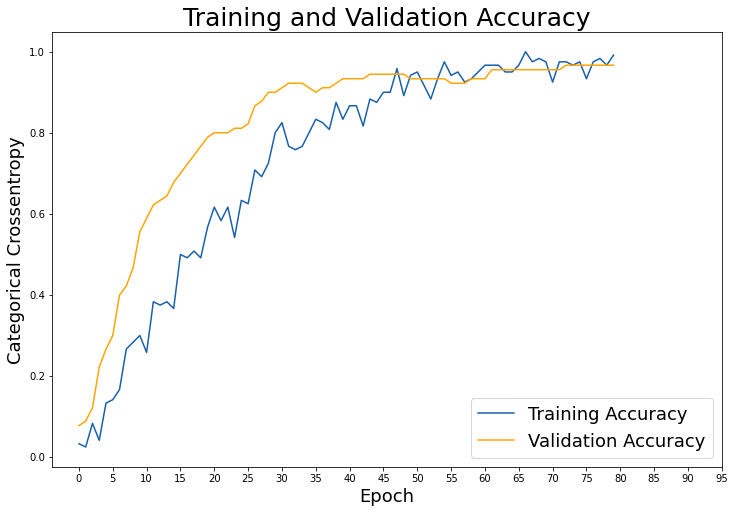

In [58]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

In [59]:
X_test

array([[ 1.6439197 , -0.66705745,  0.40761623, ...,  0.1933992 ,
         0.81188585, -0.37763207],
       [ 0.82065423, -0.03634415,  0.38104615, ..., -0.25613655,
        -1.05305501,  1.20166317],
       [ 0.07160603, -0.34774393, -2.31216736, ..., -0.47809386,
         0.12107893,  0.40776552],
       ...,
       [-0.02463963,  0.49004839, -0.31805982, ...,  0.15232666,
        -0.53812612,  0.31016801],
       [ 0.92009026, -0.64427064, -2.10168875, ..., -0.26789011,
        -1.06455777, -0.97790866],
       [-0.43689969, -0.24393842,  0.15378906, ...,  0.49426057,
         0.22667016,  0.59251184]])

In [60]:
# We get our predictions from the test data
predictions =  np.argmax(model.predict(X_test), axis=-1)

3/3 [==============================] - 0s 2ms/step


In [61]:
# We transform back our predictions to the speakers ids
predictions = lb.inverse_transform(predictions)

In [62]:
test_df['predictions'] = predictions

In [63]:
test_df

,file,speaker,predictions
0,7312-92432-0004.flac,7312,7312
1,8014-112586-0006.flac,8014,8014
2,8088-284756-0005.flac,8088,8088
3,8051-118101-0004.flac,8051,8051
4,7635-105409-0005.flac,7635,7635
...,...,...,...
85,8123-275193-0004.flac,8123,8123
86,7800-283478-0004.flac,7800,7800
87,8468-286673-0005.flac,8468,8468
88,8238-274553-0005.flac,8238,8238


In [64]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [65]:
print_full(test_df)

                     file speaker predictions
0    7312-92432-0004.flac    7312        7312
1   8014-112586-0006.flac    8014        8014
2   8088-284756-0005.flac    8088        8088
3   8051-118101-0004.flac    8051        8051
4   7635-105409-0005.flac    7635        7635
5   8098-275181-0004.flac    8098        8098
6   8098-275181-0005.flac    8098        8098
7   8324-286681-0005.flac    8324        8324
8   8312-279790-0004.flac    8312        8312
9    7278-91083-0005.flac    7278        7278
10   7505-83618-0005.flac    7505        7402
11  8123-275193-0005.flac    8123        8123
12  7517-100429-0005.flac    7517        7517
13  8425-246962-0004.flac    8425        8425
14  7794-295947-0006.flac    7794        7794
15   7505-83618-0004.flac    7505        7505
16  8088-284756-0006.flac    8088        8088
17  8312-279790-0006.flac    8312        8312
18  8465-246940-0005.flac    8465        8465
19   7402-59171-0005.flac    7402        7402
20   7505-83618-0006.flac    7505 

In [66]:
test_df[test_df['speaker'] != test_df['predictions']]

,file,speaker,predictions
10,7505-83618-0005.flac,7505,7402
24,7367-86737-0005.flac,7367,8419
61,7367-86737-0006.flac,7367,8419


In [67]:

print((1-round(len(test_df[test_df['speaker'] != test_df['predictions']])/len(test_df),3))*100,'%')

96.7 %


In [68]:
test_df[test_df['speaker'] == test_df['predictions']]

,file,speaker,predictions
0,7312-92432-0004.flac,7312,7312
1,8014-112586-0006.flac,8014,8014
2,8088-284756-0005.flac,8088,8088
3,8051-118101-0004.flac,8051,8051
4,7635-105409-0005.flac,7635,7635
...,...,...,...
85,8123-275193-0004.flac,8123,8123
86,7800-283478-0004.flac,7800,7800
87,8468-286673-0005.flac,8468,8468
88,8238-274553-0005.flac,8238,8238
